               Name  Gender   Department    Salary     Location     Rating
0      Ches Bonnell    Male        Sales   $88,050     Bellevue  Very Good
1  Garwin Peasegood  Female  Engineering   $68,220     Bellevue       Good
2   Sidoney Yitzhok  Female          NaN  $118,440   Wellington  Not Rated
3  Saunders Blumson    Male        Legal   $56,370  Los Angeles  Very Good
4    Gardy Grigorey  Female      Support  $107,090  Los Angeles       Poor
Gender
Male      544
Female    471
Name: count, dtype: int64
Department                Gender
Accounting                Male      42
                          Female    30
Business Development      Female    42
                          Male      42
Engineering               Male      44
                          Female    38
Human Resources           Female    44
                          Male      42
Legal                     Male      56
                          Female    36
Marketing                 Male      36
                          F

<ipython-input-5-770019ae1dce>:57: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gender_pay_gap_dept = data.groupby('Department').apply(
<ipython-input-5-770019ae1dce>:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gender_pay_gap_location = data.groupby('Location').apply(


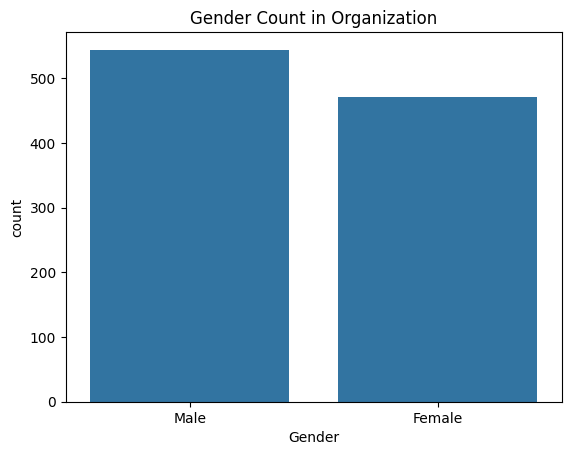

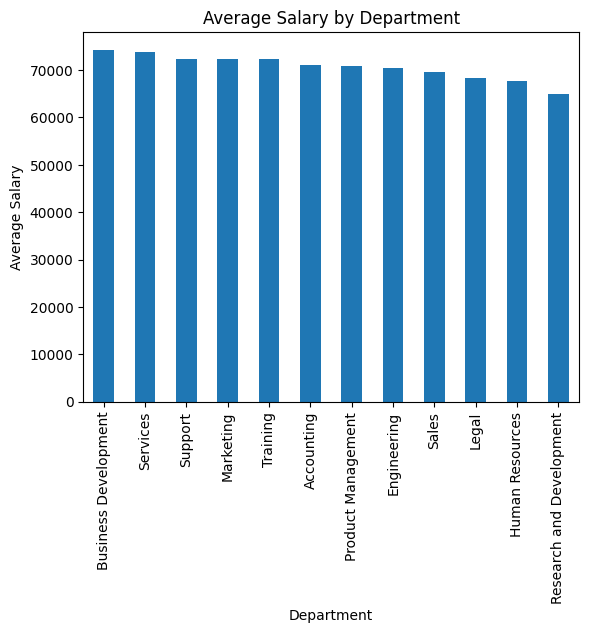

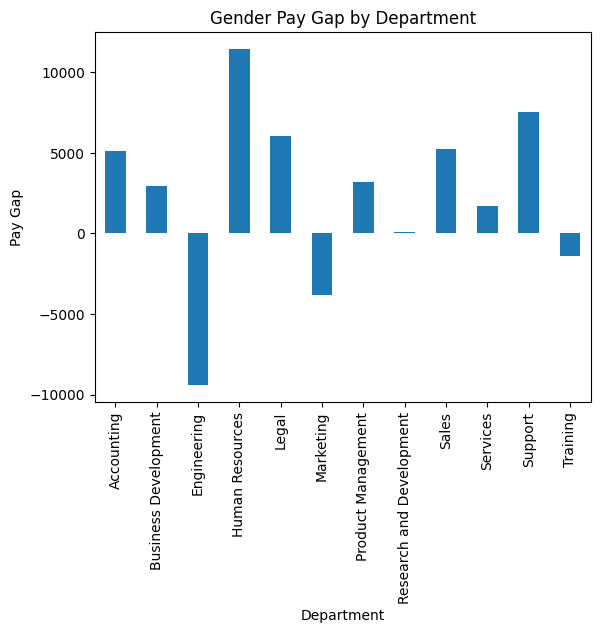

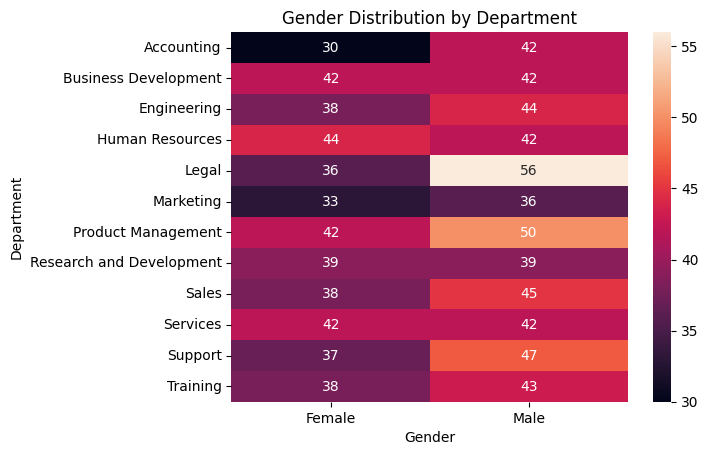

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('HR Analytics.csv')
print(data.head())

# Strip any leading/trailing spaces in column names
data.columns = data.columns.str.strip()

# Count of male/female in the organization
gender_count = data['Gender'].value_counts()
print(gender_count)

# Count of male/female in the department/location
gender_by_department = data.groupby('Department')['Gender'].value_counts()
gender_by_location = data.groupby('Location')['Gender'].value_counts()
print(gender_by_department)
print(gender_by_location)

# Clean the 'Salary' column: Remove dollar signs and commas, then convert to numeric
data['Salary'] = data['Salary'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
# Convert to numeric
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')

# Department with highest average pay
avg_salary_by_department = data.groupby('Department')['Salary'].mean().sort_values(ascending=False)
print(avg_salary_by_department)

# Location with highest average pay
avg_salary_by_location = data.groupby('Location')['Salary'].mean().sort_values(ascending=False)
print(avg_salary_by_location)

# Ratings mapping to numeric values
rating_map = {
    'Very Good': 5,
    'Good': 4,
    'Average': 3,
    'Fair': 2,
    'Poor': 1,
    'Not Rated': 0
}

# Apply the rating mapping to create a new numeric 'Rating_Numeric' column
data['Rating_Numeric'] = data['Rating'].map(rating_map)

# Calculate the average rating (using the mapped numeric values)
avg_rating = data['Rating_Numeric'].mean()
print(f'Average Rating: {avg_rating:.2f}')

# Frequency count of ratings (normalize=True to get percentage)
rating_counts = data['Rating'].value_counts(normalize=True) * 100
print(rating_counts)

# Gender pay gap by department
gender_pay_gap_dept = data.groupby('Department').apply(
    lambda x: x[x['Gender'] == 'Male']['Salary'].mean() - x[x['Gender'] == 'Female']['Salary'].mean()
)
print(gender_pay_gap_dept)

# Gender pay gap by location
gender_pay_gap_location = data.groupby('Location').apply(
    lambda x: x[x['Gender'] == 'Male']['Salary'].mean() - x[x['Gender'] == 'Female']['Salary'].mean()
)
print(gender_pay_gap_location)

## Visualization
# Bar plot for gender
sns.countplot(x='Gender', data=data)
plt.title('Gender Count in Organization')
plt.show()

# Average salary by department
avg_salary_by_department.plot(kind='bar')
plt.title('Average Salary by Department')
plt.ylabel('Average Salary')
plt.show()

# Gender pay gap visualization by department
gender_pay_gap_dept.plot(kind='bar')
plt.title('Gender Pay Gap by Department')
plt.ylabel('Pay Gap')
plt.show()

# Heatmap for Gender Distribution by Department/Location
gender_distribution = data.pivot_table(index='Department', columns='Gender', values='Name', aggfunc='count', fill_value=0)
sns.heatmap(gender_distribution, annot=True, fmt='d')
plt.title('Gender Distribution by Department')
plt.show()
